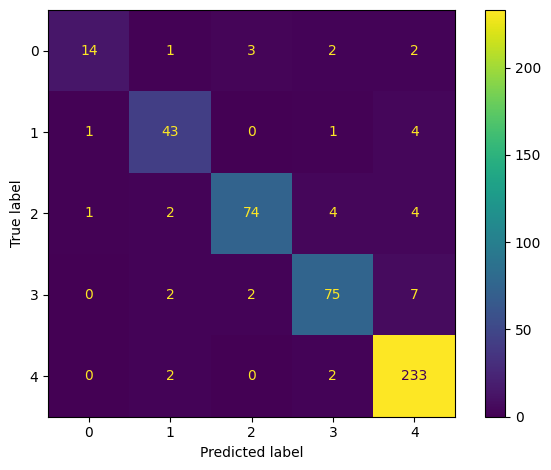

In [1]:
import json, numpy as np, pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

r = json.load(open("artifact/model_report.json"))
y_true = np.array([int(x) for x in r["classification_report"]["true_labels"]]) if "true_labels" in r["classification_report"] else None

import pandas as pd
from src.components.data_transformation import DataTransformation

pre = pickle.load(open("artifact/preprocessor.pkl","rb"))
model = pickle.load(open("artifact/model.pkl","rb"))
test = pd.read_csv("artifact/test.csv")
y = test["GradeClass"].astype(int).values
X = test.drop(columns=["GradeClass","StudentID"], errors="ignore")
X_tr = pre.transform(X)
y_pred = model.predict(X_tr)

cm = confusion_matrix(y, y_pred, labels=[0,1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot(values_format="d")
plt.tight_layout(); plt.show()


In [1]:
import pickle, numpy as np
pre = pickle.load(open("artifact/preprocessor.pkl","rb"))
model = pickle.load(open("artifact/model.pkl","rb"))

num_cols = pre.transformers_[0][2] 
cat_cols = pre.transformers_[1][2] 
ohe = pre.named_transformers_["cat"].named_steps["onehot"]
ohe_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.r_[num_cols, ohe_names]

importances = getattr(model, "feature_importances_", None)
if importances is not None:
    top_idx = np.argsort(importances)[::-1][:20]
    for i in top_idx:
        print(f"{feature_names[i]:40s}  {importances[i]:.4f}")
else:
    print("Model has no feature_importances_ (skip for non-tree models).")


GPA                                       0.9863
StudyTimeWeekly                           0.0070
Absences                                  0.0030
ParentalEducation_3                       0.0004
ParentalSupport_2                         0.0004
Ethnicity_3                               0.0003
Ethnicity_0                               0.0003
Gender_1                                  0.0002
Ethnicity_2                               0.0002
ParentalSupport_4                         0.0002
ParentalSupport_3                         0.0002
Age                                       0.0002
Gender_0                                  0.0002
ParentalEducation_4                       0.0002
ParentalEducation_2                       0.0001
Music_0                                   0.0001
Music_1                                   0.0001
ParentalEducation_0                       0.0001
Sports_0                                  0.0001
Tutoring_0                                0.0001


In [2]:
import pickle, pandas as pd

pre = pickle.load(open("artifact/preprocessor.pkl","rb"))
model = pickle.load(open("artifact/model.pkl","rb"))

def predict_one(sample: dict):
    X = pd.DataFrame([sample])
    X_tr = pre.transform(X)
    y_pred = model.predict(X_tr)
    return int(y_pred[0])

row = {
    "Age": 17, "StudyTimeWeekly": 8, "Absences": 3, "GPA": 3.4,
    "Gender": "F", "Ethnicity": "GroupA", "ParentalEducation": "Bachelors",
    "Tutoring": "Yes", "ParentalSupport": "High", "Extracurricular": "Yes",
    "Sports": "No", "Music": "Yes", "Volunteering": "No"
}
print(predict_one(row))


1
